## Iremos criar um filtro no domínio da frequência a partir de um filtro espacial

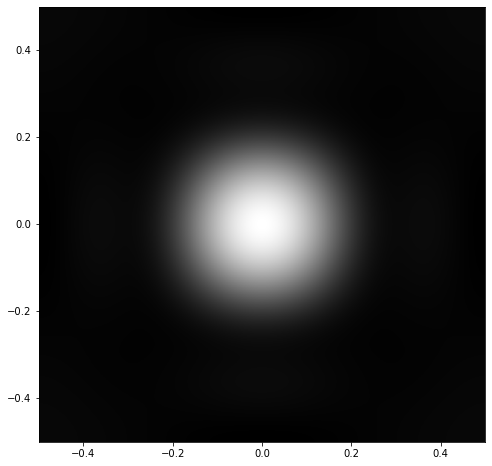

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

# Filtro suavização 7x7
filt = np.array([
    [ 1,  4,  8, 10,  8,  4,  1],
    [ 4, 12, 23, 30, 23, 12,  4],
    [ 8, 23, 45, 55, 45, 23,  8],
    [10, 30, 55, 70, 55, 30, 10],
    [ 8, 23, 45, 55, 45, 23,  8],
    [ 4, 12, 23, 30, 23, 12,  4],
    [ 1,  4,  8, 10,  8,  4,  1]
])
filt = filt/filt.sum()

img = plt.imread('test_image.tiff')
num_rows, num_cols = img.shape
# Como já visto, a imagem a ser filtrada deve ser preenchida 
# com zeros utilizando a função pad
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), 
                    mode='constant', constant_values=0)

# Criação do array a ser utilizado para filtrar a imagem
filt_image = np.zeros([2*num_rows, 2*num_cols])
filt_image[num_rows-3:num_rows+4, num_cols-3:num_cols+4] = filt

filt_image = fftshift(filt_image)
Ffilt = fft2(filt_image)
freq_r = fftfreq(2*num_rows)
freq_c = fftfreq(2*num_cols)

Ffilt = fftshift(Ffilt)
freq_r = fftshift(freq_r)
freq_c = fftshift(freq_c)
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Ffilt+1)), cmap='gray')

#### Ffilt é o array a ser utilizado no domínio da frequência para filtrar a imagem original. 

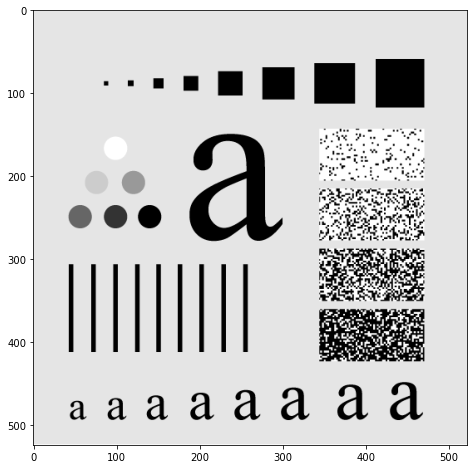

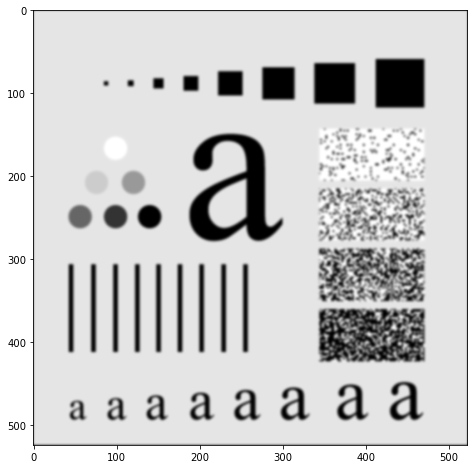

In [2]:
Fimg = fft2(img_padded)
Fimg = fftshift(Fimg)

Fimg_filtered = Ffilt*Fimg
Fimg_filtered = fftshift(Fimg_filtered)
img_filtered = np.real(ifft2(Fimg_filtered))
img_filtered = img_filtered[:num_rows, :num_cols]
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')
plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')